[View in Colaboratory](https://colab.research.google.com/github/suzanaporto/DRScan_versao1/blob/master/SequenceFilter.ipynb)

#UPLOAD FILE FROM PC

## Loader (Upload files from pc)

In [2]:
#Uploading the Dataset 
from google.colab import files
uploaded = files.upload()

Saving NovoAlzheimerAntigo.tsv to NovoAlzheimerAntigo (1).tsv


In [3]:
!ls

NovoAlzheimerAntigo (1).tsv  NovoAlzheimerAntigo.tsv  sample_data


In [0]:
import pandas as pd

df_fimo_output = pd.read_csv('NovoAlzheimerAntigo.tsv', sep='\t') 


##Create Position Dictionary

In [0]:
def snps_dict_pos(snps_array):
  dict_pos = {}
  #insert pair (name,location) in dictionary
  for i in range(len(snps_array)):
    dict_pos[snp[i].name] = snp[i].location
  return dict_pos

## Manipulating Data Frames

###Single sequence

In [0]:
def single_sequence_testes(snp_location, table_output):
  #table into data frame
  df_fimo_output = pd.DataFrame.from_csv(table_output, sep='\t')
  df_fimo_output = df_fimo_output.dropna()
  #stat values into array
  array_start = df_fimo_output['start'].values
  #stop values into array
  array_stop = df_fimo_output['stop'].values
  #sequence names into array
  array_sequence = df_fimo_output['sequence_name'].values
  #prints first 10 rows
  table_10 = df_fimo_output.head(10)
  print(table_10)
  #loop prints values from start array and stop array
  for i in range(array_start.size):
    #verify if snp_location is between start and stop values
    if snp_location>= array_start[i] and snp_location<= array_stop[i]:
      pass
     #print ("Numero array start: " +str(array_start[i]))
     #print ("Numero array stop: " + str(array_stop[i]))
     #print ("ACHOU")
  #remove duplicates from array.
  #tabela = df_fimo_output.drop_duplicates('motif_if',False,False)
  #prints first 10 rows
  df_fimo_output.head(10)
  print (table_10)
  

####Get unique array

In [0]:
def unique_array (data_frame, column_name):
  #any column
  array_motifs = data_frame[column_name].values
  
  motifs_unique = []
  # create list of unique motifs
  motifs_unique = np.unique(array_motifs)
  
  print (motifs_unique)
  
  #show list with all motifs with the respective name
  for motif in array_motifs:
    new_A = new_df.loc[(new_df.motif_alt_id == 'RREB1')]
  #display(new_A)
  #print ("Indices: ", idx, "seq name: ", seq_name ,motif)
  

####Get snp id inside header

In [0]:
def single_sequence_header(table_output):
  #table into data frame
  df_fimo_output = pd.DataFrame.from_csv(table_output, sep='\t')
  #sequences values in array
  array_sequence = df_fimo_output['sequence_name'].values
  for i in range(10):
    header = array_sequence[i]
    print(header)
    header_elements = header.split('|')
    print ("É pra ser o nome da snp: " + header_elements[1])
    
    
  

###Row out of range

In [0]:
def row_out_of_range_single(seq_start,seq_stop,seq_name,idx):
        
  relative_position =  int(seq_name.split('|')[4])
  condition_3 = relative_position < seq_start 
  condition_2 = relative_position > seq_stop
  #index list
  index_list = []

  if  (condition_3 or condition_2) :
    return idx
  else:
    return None


In [0]:
def row_out_of_range_multiple(seq_start,seq_stop,seq_name,idx):
  #check outside portion of positions
  relative_position_list =  seq_name.split('|')[4:]
  #index list
  index_list = []
  verify = false
  
  for position in relative_position_list:
    
    condition_3 = position > seq_start 
    condition_2 = position < seq_stop
    #condition tests if there is at least one snp in start-stop range 
    if (condition_3 and condition_2) :
      verify = true
  if verify:
    return None
  else:
    return idx

In [0]:
def filter_range(table_output):
  #table into data frame
  df_fimo_output = pd.read_csv(table_output, sep='\t')
  df_fimo_output = df_fimo_output.dropna()
  #start values into array
  array_start = df_fimo_output['start'].values
  #stop values into array
  array_stop = df_fimo_output['stop'].values
  #sequence name values
  array_sequence_name = df_fimo_output['sequence_name'].values
  #index list
  index_list = []
  
  #with pd.option_context('display.max_rows', 100, 'display.max_columns', 100):
  #  display(df_fimo_output)
  
  for idx, (seq_start,seq_stop,seq_name) in enumerate( zip(array_start, array_stop, array_sequence_name) ):
    
    seq_type = seq_name.split('|')[0]
    condition_1 = seq_type == 'sequence_variation'
    condition_2 = seq_type == 'sequence_wild_type'
    condition_3 = seq_type == 'sequence_combinations'
    
    #first filter is out_of_range filter
    if (condition_1 or condition_2):
      index = row_out_of_range_single(seq_start,seq_stop,seq_name,idx)
      if (not(index == None)):
        index_list.append(index)
    if (condition_3):
      index = row_out_of_range_multiple(seq_start,seq_stop,seq_name,idx)
      if (not(index == None)):
        index_list.append(index)
      
  #print (str(index_list))
  print ("Tamanho da lista: " + str(len(index_list)))
  #print ("-------------------------Testando----------------------------")
  #filter by id
  #new_df = df_fimo_output.drop(df_fimo_output.index[index_list],axis=0)
  idx_list_selected = [ i for i in range(len(df_fimo_output)) if not i in index_list ]
  
  new_df = df_fimo_output.iloc[idx_list_selected]
  
  return new_df
  

###Filter equivalents

In [0]:
def single_equivalents(data_frame):
  pass
  

In [0]:
def multiple_equivalents(data_frame):
  pass

### Get snps inside TF start-stop position
uses position dictionary

In [0]:
def pos_in_TF(start,stop):
  
  pos_list = []
  
  #loop snps dict
  for snp in snps_dict:
    position = snps_dict[snp]
    
    condition_1 = position >= start
    condition_2 = position <= stop
  
    if condition_1 and condition_2:
      pos_list.add(position)
      
  return pos_list
    

In [0]:
def snps_in_TF(start,stop):
  
  snps_list = []
  
  #loop snps dict
  for snp in snps_dict:
    position = snps_dict[snp]
    
    condition_1 = position >= start
    condition_2 = position <= stop
  
    if condition_1 and condition_2:
      snps_list.add(snp)
      
  return snps_list
  

###Filter Data Frame

In [0]:
def filter_dataframe(table_output, log=False):
  
  new_df = filter_range(table_output)
  
  print ("Tamanho linha: ", len(new_df))  
  #display(new_df)
  
  #display sorted motifs
  #display (new_df.sort_values(['motif_alt_id','start']))
  #display (new_df)
  
  #start values(new_df) into array
  array_start = new_df['start'].values
  #stop values(new_df) into array
  array_stop = new_df['stop'].values
  #sequence name(new_df) values
  array_sequence_name = new_df['sequence_name'].values
  #array motifs
  array_motifs = new_df['motif_alt_id'].values
  
  #iterate through entire list/need treatment for combinations
  for idx, (seq_start,seq_stop,seq_name,motif) in enumerate( zip(array_start, array_stop, array_sequence_name, array_motifs) ):
      #current variables
      current_index = idx
      verify_index = False
      current_motif = motif
      current_seq_name = seq_name
      current_start = seq_start
      current_stop = seq_stop
      
      seq_type = seq_name.split('|')[0]
      condition_1 = seq_type == 'sequence_variation'
      condition_2 = seq_type == 'sequence_wild_type'
      condition_3 = seq_type == 'sequence_combinations'
      
      if condition_1 or condition_2:
        for idx, (seq_start,seq_stop,seq_name,motif) in enumerate( zip(array_start, array_stop, array_sequence_name, array_motifs) ):
          snp_name = seq_name.split('|')[1]
          #compare list with current values
          condition_m = current_motif == motif
          condition_sn = current_seq_name.split('|')[0] != seq_name.split('|')[0]
          condition_sn2 = current_seq_name.split('|')[1] == seq_name.split('|')[1]
          condition_csta = current_start == seq_start
          condition_csta1 = seq_start == range(int(current_start-50),int(current_start))
          condition_csto = current_stop == seq_stop
          condition_csto1 = seq_stop == range(int(current_stop),int(current_stop + 50))
        
          if condition_m and condition_sn and condition_sn2 and (condition_csta or condition_csta1).any and (condition_csto or condition_csto1).any:
            #new data frame droping all occurences of specified TF-snp pair
            new_df = new_df.drop(new_df[(new_df.motif_alt_id == motif) & (new_df.sequence_name.str.contains(snp_name))].index)
            
      #missing tests/half completed/reset variables after processing    
      if condition_3:
        count = 0
        #get number of all snps in combinations sequence
        for i in current_seq_name.split('|'):
          if i[:2] == 'rs':
            count = count + 1
        total = count
        print (total)
        #snp list
        snp_list = current_seq_name.split('|')[1:total+1]
        #allele list
        allele_list = []
        #for i in range(len(current_seq_name.split('|')[total+1:]))
        #  if !(current_seq_name.split('|')[i].isDigit):
        #    allele_list.add(current_seq_name.split('|')[i])
        #allele_list = current_seq_name.split('|')[total+1:]
        size_in_list = len(snp_in_list)
        allele_list = current_seq_name.split('|')[total+1:((total+1)+size_in_list)+1]
        #get positions
        position_in_list = pos_in_TF(current_start,current_stop)
        snp_in_list = snp_in_TF(current_start,current_stop)
        
        for idx, (seq_start,seq_stop,seq_name,motif) in enumerate( zip(array_start, array_stop, array_sequence_name, array_motifs) ):
          
          condition_m = current_motif == motif
          condition_sn2 = snp_list == seq_name.split('|')[1:total]
          #range search needs maintain in snp start stop in snp range.
          condition_csta = current_start == seq_start
          condition_csto = current_stop == seq_stop
          condition_al_dif = allele_list != seq_name.split('|')[total+1:((total+1)+size_in_list)+1]
        
          if condition_m and condition_sn2 and condition_csta and condition_csto and condition_al_dif:
            #new data frame droping all occurences of specified TF-snps pair
            new_df = new_df.drop(new_df[(new_df.motif_alt_id == motif) & (new_df.sequence_name.str.contains(snp_list))].index)
          
  display (new_df.sort_values(['motif_alt_id','start']))
  print ("Tamanho DataFrame: ",len(new_df))
  return new_df

###Count Differential Snps (Single)

In [0]:
def count_snps (filtered_dataframe):
  subtotals = filtered_dataframe.groupby(filtered_dataframe['sequence_name'].str.split('|').str[1]).count()
  total = subtotals.drop(columns=['sequence_name', 'motif_alt_id','start', 
                                  'stop','strand','score','p-value','q-value',
                                  'matched_sequence'])
  total = total.reset_index().rename(index=str, 
                                     columns={'sequence_name': "SNP NAME", 
                                              "motif_id": "COUNT"})
  display(total)
  total.plot.bar(x='SNP NAME', y='COUNT',rot=0) 

##Download From Google Colab

In [0]:
from google.colab import files

df_fimo_output.to_csv('df_fimo.csv')
files.download('df_fimo.csv')

##Testes

In [24]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
f_dataframe = filter_dataframe ('NovoAlzheimerAntigo.tsv',True)



Tamanho da lista: 384
Tamanho linha:  52


,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
95,MA0154.3,EBF1,sequence_wild_type|rs8103315|19|C|51,47.0,60.0,-,12.39340,0.000017,0.03550,GGACCCCAGGGACT
110,MA0154.3,EBF1,sequence_wild_type|rs8103315|19|C|51,47.0,60.0,+,11.85250,0.000022,0.03550,AGTCCCTGGGGTCC
345,MA0149.1,EWSR1-FLI1,sequence_variation|rs439401|19|C|51,43.0,60.0,-,-14.81580,0.000072,0.03000,GGTGGGAGGGGAAGAGAG
148,MA0092.1,Hand1::Tcf3,sequence_variation|rs405509|19|G|51,45.0,54.0,+,12.13480,0.000030,0.10800,TGTCTGGATT
106,MA0155.1,INSM1,sequence_wild_type|rs8100239|19|T|51,51.0,62.0,+,12.76530,0.000021,0.07060,TTTCAGGGGTCT
233,MA0741.1,KLF16,sequence_variation|rs439401|19|C|51,49.0,59.0,+,11.20690,0.000047,0.04070,TCCCCTCCCAC
105,MA0599.1,KLF5,sequence_variation|rs439401|19|C|51,49.0,58.0,+,13.46940,0.000021,0.02980,TCCCCTCCCA
381,MA0599.1,KLF5,sequence_variation|rs2075650|19|G|51,49.0,58.0,-,10.79590,0.000086,0.03370,ACTCCACCCC
314,MA0863.1,MTF1,sequence_wild_type|rs8103315|19|C|51,38.0,51.0,+,6.50000,0.000064,0.21200,TCTGCAGACAGTCC
138,MA0057.1,MZF1(var.2),sequence_variation|rs439401|19|C|51,47.0,56.0,-,12.01010,0.000028,0.05990,GGAGGGGAAG


Tamanho DataFrame:  24


In [0]:
plt.style.available

,SNP NAME,COUNT
0,rs157580,3
1,rs1871047,1
2,rs2075650,3
3,rs405509,2
4,rs439401,9
5,rs8100239,3
6,rs8103315,3


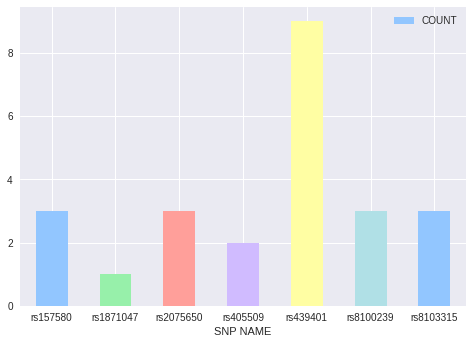

In [21]:
count_snps(f_dataframe)

In [0]:
from google.colab import files

df_fimo_output.to_csv('df_fimo.csv')
files.download('df_fimo.csv')